<a href="https://colab.research.google.com/github/habiclaude88/Ridge_Regression_Model/blob/main/Submission_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Data Analysis for completion of Master of Data Science**

In [ ]:
# Libraries needed for analysis
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
import plotly.express as px
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression, Ridge  # noqa F401
from sklearn.metrics import mean_absolute_error
from sklearn.utils.validation import check_is_fitted

In [ ]:
df = pd.read_excel('Data for thesis.xlsx',index_col=0)
# Set the display options to show all columns and rows
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# Print the data frame in full
print(df)

               GDP           GDS          Cons          Govt        Export  \
Year                                                                         
1960  1.190000e+08  1.000007e+07  1.090000e+08  1.200000e+07  1.480000e+07   
1961  1.220000e+08  9.999986e+06  1.120000e+08  1.240000e+07  1.400000e+07   
1962  1.250000e+08  5.599980e+06  1.194000e+08  1.320000e+07  1.160000e+07   
1963  1.280000e+08  1.400024e+06  1.266000e+08  1.400000e+07  7.600000e+06   
1964  1.300000e+08  9.999984e+06  1.200000e+08  1.400000e+07  1.560000e+07   
1965  1.488000e+08  7.400008e+06  1.414000e+08  2.100000e+07  1.800000e+07   
1966  1.245257e+08  1.177144e+06  1.233486e+08  1.712000e+07  1.404571e+07   
1967  1.595600e+08  3.840000e+06  1.557200e+08  1.803000e+07  1.677300e+07   
1968  1.722000e+08  3.080001e+06  1.691200e+08  1.482000e+07  1.505000e+07   
1969  1.887000e+08 -1.000010e+05  1.888000e+08  1.660000e+07  1.449000e+07   
1970  2.199000e+08  7.300014e+06  2.126000e+08  1.920000e+07  2.

In [ ]:
# create a Boolean mask to select rows with non-negative values
mask = df >= 0

# apply the mask to the DataFrame to drop rows with negative values
df = df[mask]

In [ ]:
# Read Dataframe
df = df.drop(columns = ["GDS_Minplus1", "NGDS"])
df

,GDP,GDS,Cons,Govt,Export
Year,,,,,
1960,1.190000e+08,1.000007e+07,1.090000e+08,1.200000e+07,1.480000e+07
1961,1.220000e+08,9.999986e+06,1.120000e+08,1.240000e+07,1.400000e+07
1962,1.250000e+08,5.599980e+06,1.194000e+08,1.320000e+07,1.160000e+07
1963,1.280000e+08,1.400024e+06,1.266000e+08,1.400000e+07,7.600000e+06
1964,1.300000e+08,9.999984e+06,1.200000e+08,1.400000e+07,1.560000e+07
1965,1.488000e+08,7.400008e+06,1.414000e+08,2.100000e+07,1.800000e+07
1966,1.245257e+08,1.177144e+06,1.233486e+08,1.712000e+07,1.404571e+07
1967,1.595600e+08,3.840000e+06,1.557200e+08,1.803000e+07,1.677300e+07
1968,1.722000e+08,3.080001e+06,1.691200e+08,1.482000e+07,1.505000e+07


In [ ]:
# to Fill the null value with mean
df.fillna(value=df.mean(),inplace=True)
df

,GDP,GDS,Cons,Govt,Export
Year,,,,,
1960,1.190000e+08,1.000007e+07,1.090000e+08,1.200000e+07,1.480000e+07
1961,1.220000e+08,9.999986e+06,1.120000e+08,1.240000e+07,1.400000e+07
1962,1.250000e+08,5.599980e+06,1.194000e+08,1.320000e+07,1.160000e+07
1963,1.280000e+08,1.400024e+06,1.266000e+08,1.400000e+07,7.600000e+06
1964,1.300000e+08,9.999984e+06,1.200000e+08,1.400000e+07,1.560000e+07
1965,1.488000e+08,7.400008e+06,1.414000e+08,2.100000e+07,1.800000e+07
1966,1.245257e+08,1.177144e+06,1.233486e+08,1.712000e+07,1.404571e+07
1967,1.595600e+08,3.840000e+06,1.557200e+08,1.803000e+07,1.677300e+07
1968,1.722000e+08,3.080001e+06,1.691200e+08,1.482000e+07,1.505000e+07


In [ ]:
# logging values
df = np.log(df)
df

,GDP,GDS,Cons,Govt,Export
Year,,,,,
1960,18.594634,16.118102,18.506858,16.300417,16.510138
1961,18.619532,16.118094,18.534010,16.333207,16.454568
1962,18.643824,15.538274,18.597990,16.395727,16.266516
1963,18.667541,14.152000,18.656543,16.454568,15.843659
1964,18.683045,16.118094,18.603002,16.454568,16.562781
1965,18.818114,15.816992,18.767103,16.860033,16.705882
1966,18.640023,13.978602,18.630525,16.655758,16.457828
1967,18.887931,15.160983,18.863570,16.707548,16.635281
1968,18.964167,14.940440,18.946119,16.511488,16.526888


In [ ]:
import pandas as pd
from statsmodels.tsa.stattools import adfuller

# check if the series are stationary using the ADF test
for col in df.columns:
    result = adfuller(df[col])
    print(f'Variable: {col}')
    print(f'ADF Statistic: {result[0]}')
    print(f'p-value: {result[1]}')
    print('Critical Values:')
    for key, value in result[4].items():
        print(f'\t{key}: {value:.3f}')
    if result[1] < 0.05:
        print('Result: The series is stationary.\n')
    else:
        print('Result: The series is non-stationary.\n')


Variable: GDP
ADF Statistic: -0.9378303336750492
p-value: 0.7752592776860667
Critical Values:
	1%: -3.544
	5%: -2.911
	10%: -2.593
Result: The series is non-stationary.

Variable: GDS
ADF Statistic: -1.0119698761145492
p-value: 0.7488735664522719
Critical Values:
	1%: -3.555
	5%: -2.916
	10%: -2.596
Result: The series is non-stationary.

Variable: Cons
ADF Statistic: -1.1164593537550567
p-value: 0.7084636720085897
Critical Values:
	1%: -3.544
	5%: -2.911
	10%: -2.593
Result: The series is non-stationary.

Variable: Govt
ADF Statistic: -1.003174777858905
p-value: 0.7521046133750864
Critical Values:
	1%: -3.544
	5%: -2.911
	10%: -2.593
Result: The series is non-stationary.

Variable: Export
ADF Statistic: -0.3210610188524684
p-value: 0.9224680423181817
Critical Values:
	1%: -3.544
	5%: -2.911
	10%: -2.593
Result: The series is non-stationary.



In [ ]:
import pandas as pd

# # apply first-order differencing to the columns
data_diff = df.diff().dropna()

# check if the resulting series are stationary using the ADF test
from statsmodels.tsa.stattools import adfuller

for col in data_diff.columns:
    result = adfuller(data_diff[col])
    print(f'Variable: {col}')
    print(f'ADF Statistic: {result[0]}')
    print(f'p-value: {result[1]}')
    print('Critical Values:')
    for key, value in result[4].items():
        print(f'\t{key}: {value:.3f}')
    if result[1] < 0.05:
        print('Result: The series is stationary.\n')
    else:
        print('Result: The series is non-stationary.\n')


Variable: GDP
ADF Statistic: -8.771682127733802
p-value: 2.5111248153261688e-14
Critical Values:
	1%: -3.546
	5%: -2.912
	10%: -2.594
Result: The series is stationary.

Variable: GDS
ADF Statistic: -4.644039764216263
p-value: 0.00010706360048460223
Critical Values:
	1%: -3.555
	5%: -2.916
	10%: -2.596
Result: The series is stationary.

Variable: Cons
ADF Statistic: -7.221551096264209
p-value: 2.104940758015916e-10
Critical Values:
	1%: -3.546
	5%: -2.912
	10%: -2.594
Result: The series is stationary.

Variable: Govt
ADF Statistic: -8.566443857223403
p-value: 8.421513126138933e-14
Critical Values:
	1%: -3.546
	5%: -2.912
	10%: -2.594
Result: The series is stationary.

Variable: Export
ADF Statistic: -7.913138212641094
p-value: 3.899417543326465e-12
Critical Values:
	1%: -3.546
	5%: -2.912
	10%: -2.594
Result: The series is stationary.



In [ ]:
# to shift lgdp variable for one lag to be sure that previous values are predicting current values
df['lgdp.L1'] = df['GDP'].shift(-1)


In [ ]:
df['lgdp.L1']

Year
1960    18.619532
1961    18.643824
1962    18.667541
1963    18.683045
1964    18.818114
1965    18.640023
1966    18.887931
1967    18.964167
1968    19.055669
1969    19.208683
1970    19.222470
1971    19.322701
1972    19.487961
1973    19.547098
1974    20.164411
1975    20.273463
1976    20.431108
1977    20.624229
1978    20.827037
1979    20.950214
1980    21.064770
1981    21.064898
1982    21.115097
1983    21.185371
1984    21.263044
1985    21.388379
1986    21.492185
1987    21.596855
1988    21.600825
1989    21.659432
1990    21.371207
1991    21.430822
1992    21.402074
1993    20.440421
1994    20.980645
1995    21.047040
1996    21.339293
1997    21.411071
1998    21.491363
1999    21.449620
2000    21.398984
2001    21.398646
2002    21.482713
2003    21.588382
2004    21.799023
2005    21.922613
2006    22.126434
2007    22.367494
2008    22.458690
2009    22.535030
2010    22.652035
2011    22.758011
2012    22.779388
2013    22.832428
2014    22.867915
2015 

In [ ]:
# Deleting last values of 2020 year after becoming NaN
df = df.iloc[:-1]
df

,GDP,GDS,Cons,Govt,Export,lgdp.L1
Year,,,,,,
1960,18.594634,16.118102,18.506858,16.300417,16.510138,18.619532
1961,18.619532,16.118094,18.534010,16.333207,16.454568,18.643824
1962,18.643824,15.538274,18.597990,16.395727,16.266516,18.667541
1963,18.667541,14.152000,18.656543,16.454568,15.843659,18.683045
1964,18.683045,16.118094,18.603002,16.454568,16.562781,18.818114
1965,18.818114,15.816992,18.767103,16.860033,16.705882,18.640023
1966,18.640023,13.978602,18.630525,16.655758,16.457828,18.887931
1967,18.887931,15.160983,18.863570,16.707548,16.635281,18.964167
1968,18.964167,14.940440,18.946119,16.511488,16.526888,19.055669


In [ ]:
# Statistic Descriprive
df.describe()

,GDP,GDS,Cons,Govt,Export,lgdp.L1
count,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000
mean,20.971330,18.081220,20.937605,18.919842,18.666217,21.045731
std,1.367777,1.722526,1.360947,1.470171,1.475544,1.357679
min,18.594634,13.978602,18.506858,16.300417,15.843659,18.619532
25%,20.010082,17.087020,19.966696,18.048368,17.617358,20.246200
50%,21.355250,18.419765,21.319754,19.184597,18.767105,21.379793
75%,21.694330,19.111846,21.640526,19.840957,19.384560,21.829921
max,23.060829,20.760442,22.967879,21.215583,21.537971,23.060829


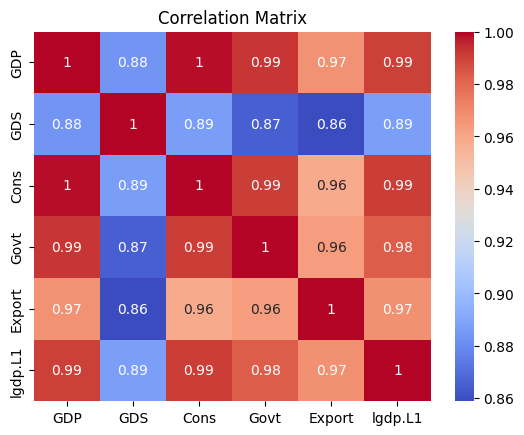

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Checking CORRELATION between variables
corr_matrix = df.corr()

# Create the heatmap using seaborn
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

# Set the title of the heatmap
plt.title('Correlation Matrix')

# Display the heatmap
plt.show()


In [ ]:
# Masking gdp variable of current values as target and others as independent features
target = "lgdp.L1"
y = df[target]
X= df.drop(columns = target)

In [ ]:
# Deviding data sets part of training and test data(80% and 20% respectively)
cutoff = int(len(X) * 0.8)

X_train, y_train = X.iloc[:cutoff], y.iloc[:cutoff]
X_test, y_test = X.iloc[cutoff:], y.iloc[cutoff:]



In [ ]:
#proof
len(X_train) + len(X_test) == len(X)

True

In [ ]:
#Metrics: Mean Absolute Error measurement compared to mean as naive metric
y_pred_baseline = [y_train.mean()] * len(y_train)
mae_baseline = mean_absolute_error(y_train, y_pred_baseline)

print("Mean GDP:", round(y_train.mean(), 2))
print("Baseline MAE:", round(mae_baseline, 2))

Mean GDP: 20.6
Baseline MAE: 0.99


In [ ]:
# Model Initiation(Ridge Rigression)
model =Ridge()

model.fit(X_train, y_train)

Ridge()

In [ ]:
# Training MAE compared to Test MAE to be sure that my model is perfoming better than training
training_mae = mean_absolute_error(y_train, model.predict(X_train))
test_mae = mean_absolute_error(y_test, model.predict(X_test))
y_pred_test = model.predict(X_test)
print("Training MAE:", round(training_mae, 2))
print("Test MAE:", round(test_mae, 2))

Training MAE: 0.11
Test MAE: 0.09


In [ ]:
# metric: mean squared error to make sure that my model is definitely performing well even though I don't want it in final report as a third metric
from sklearn.metrics import mean_squared_error
training_mse = mean_squared_error(y_train, model.predict(X_train))
test_mse = mean_squared_error(y_test, model.predict(X_test))
y_pred_test = model.predict(X_test)

print("Training MSE:", round(training_mse, 2))
print("Test MSE:", round(test_mse, 2))



Training MSE: 0.03
Test MSE: 0.01


In [ ]:
# Intercept and Coefficient for the variable of model
intercept = model.intercept_.round(4)
coefficients = model.coef_.round(4)
print(intercept)
print(coefficients)

1.3712
[0.2067 0.0463 0.4119 0.0856 0.2289]


In [ ]:
# Model score(R-Squared)
print(model.intercept_, model.coef_, model.score(X, y))


1.3711912401132693 [0.20668106 0.04628594 0.41194056 0.08563013 0.2289257 ] 0.9841337253785226
